### Task 2 : UNEMPLOYMENT ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import plotly.express as px                               
import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline
     



In [2]:
# read the dataset
df1= pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df1

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [3]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [4]:
df1.shape

(267, 9)

In [5]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df1.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [8]:
df1.duplicated().sum()

0

In [9]:
df1.Region.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

In [10]:
# rename the Attributes

df1.rename(columns={'Region':'State', 
                   'Region.1':'Region'
                   }, inplace=True)


new_column_name = df1.columns[3].replace(' (%)', '')
df1.rename(columns={df1.columns[3]: new_column_name}, inplace=True)

new_column_name = df1.columns[5].replace(' (%)', '')
df1.rename(columns={df1.columns[5]: new_column_name}, inplace=True)

In [11]:
# convert the date column Datatype

df1[' Date']=pd.to_datetime(df1[' Date'],dayfirst=True)


In [12]:
df1[' Date']

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name:  Date, Length: 267, dtype: datetime64[ns]

In [13]:
df1.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [14]:
# Extracting the Month from the date.

df1['Extracted_month'] = df1[' Date'].dt.month

In [15]:
# converting the Extracted month to Object type of month name.

df1['Month_name'] = df1['Extracted_month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   State                                 267 non-null    object        
 1    Date                                 267 non-null    datetime64[ns]
 2    Frequency                            267 non-null    object        
 3    Estimated Unemployment Rate          267 non-null    float64       
 4    Estimated Employed                   267 non-null    int64         
 5    Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                                267 non-null    object        
 7   longitude                             267 non-null    float64       
 8   latitude                              267 non-null    float64       
 9   Extracted_month                       267 non-null    int64         
 10  Mo

In [17]:
df1['Region'] = df1['Region'].astype('category') 

In [18]:
# remove the date column, after extracting it.

df1.drop(columns=' Date', inplace=True)

In [19]:
df1.columns

Index(['State', ' Frequency', ' Estimated Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude', 'Extracted_month', 'Month_name'],
      dtype='object')

In [20]:
df1['State'].nunique()

27

In [21]:
df1['Region'].nunique()

5

# Exploratory Data Analysis

In [22]:
# Basic stats

df1_stats = df1[[' Estimated Unemployment Rate',' Estimated Employed',' Estimated Labour Participation Rate']]
round(df1_stats.describe().T, 2)



count         mean          std  \
 Estimated Unemployment Rate          267.0        12.24        10.80   
 Estimated Employed                   267.0  13962105.72  13366318.36   
 Estimated Labour Participation Rate  267.0        41.68         7.85   

                                            min         25%         50%  \
 Estimated Unemployment Rate               0.50        4.84        9.65   
 Estimated Employed                   117542.00  2838930.50  9732417.00   
 Estimated Labour Participation Rate      16.77       37.26       40.39   

                                              75%          max  
 Estimated Unemployment Rate                16.76        75.85  
 Estimated Employed                   21878686.00  59433759.00  
 Estimated Labour Participation Rate        44.06        69.69

* Unemployment Rate Variation: The "Estimated Unemployment Rate" column has a relatively wide range, with a minimum of 0.50% and a maximum of 75.85%. This suggests significant variation in unemployment rates across the data points.


* Employment Levels: The "Estimated Employed" column indicates a substantial range in the number of employed individuals, with a minimum of 117,542 and a maximum of 59,433,759. This variation suggests significant differences in employment levels across the dataset.


* Labour Participation Rate Range: The "Estimated Labour Participation Rate" column also shows considerable variability, with a minimum of 16.77% and a maximum of 69.69%. This indicates differences in the proportion of the labor force participating in economic activities.


* " The dataset contains a wide range of unemployment rates, employment levels, and labor participation rates, reflecting diverse economic conditions or regions" 

* A mean estimated unemployment rate of 12.24 can be considered relatively high.
* during economic recessions or crises, unemployment rates tend to rise, and a mean rate of 12.24% might be considered high. In more stable economic conditions, a 12.24% unemployment rate would likely be seen as high.

In [23]:
# get the numerical and catagorical seperatly.

num_col = df1.select_dtypes(include='number')
cat_col = df1.select_dtypes(exclude='number')

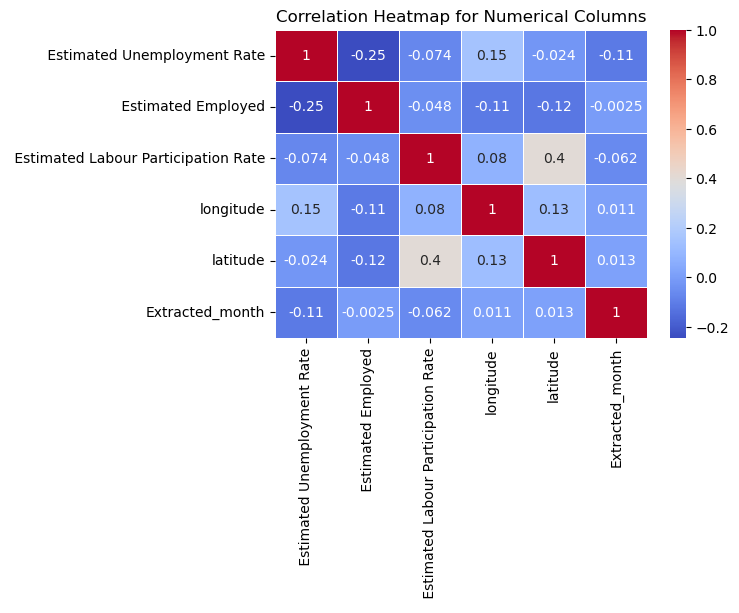

In [24]:
correlation_matrix = num_col.corr()

# Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [25]:
correlation_matrix

Estimated Unemployment Rate  \
 Estimated Unemployment Rate                              1.000000   
 Estimated Employed                                      -0.245176   
 Estimated Labour Participation Rate                     -0.073540   
longitude                                                 0.149976   
latitude                                                 -0.023976   
Extracted_month                                          -0.109654   

                                       Estimated Employed  \
 Estimated Unemployment Rate                    -0.245176   
 Estimated Employed                              1.000000   
 Estimated Labour Participation Rate            -0.047948   
longitude                                       -0.113664   
latitude                                        -0.119321   
Extracted_month                                 -0.002507   

                                       Estimated Labour Participation Rate  \
 Estimated Unemployment Rate                                     -0.073540   
 Estimated Employed                                              -0.047948   
 Estimated Labour Participation Rate                              1.000000   
longitude                                                         0.080372   
latitude                                                          0.397836   
Extracted_month                                                  -0.061983   

                                      longitude  latitude  Extracted_month  
 Estimated Unemployment Rate           0.149976 -0.023976        -0.109654  
 Estimated Employed                   -0.113664 -0.119321        -0.002507  
 Estimated Labour Participation Rate   0.080372  0.397836        -0.061983  
longitude                              1.000000  0.125895         0.011294  
latitude                               0.125895  1.000000         0.013002  
Extracted_month                        0.011294  0.013002         1.000000

##### Analysis on Region

In [26]:
df1.Region.unique()

['South', 'Northeast', 'East', 'West', 'North']
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']

In [27]:
# Stats by Region

region_stats = df1.groupby(['Region'])[[' Estimated Unemployment Rate',' Estimated Employed',' Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats, 2)
region_stats

Region   Estimated Unemployment Rate   Estimated Employed  \
0       East                         13.92          19602366.90   
1      North                         15.89          13072487.92   
2  Northeast                         10.95           3617105.53   
3      South                         10.45          14040589.33   
4       West                          8.24          18623512.72   

    Estimated Labour Participation Rate  
0                                 40.11  
1                                 38.70  
2                                 52.06  
3                                 40.44  
4                                 41.26

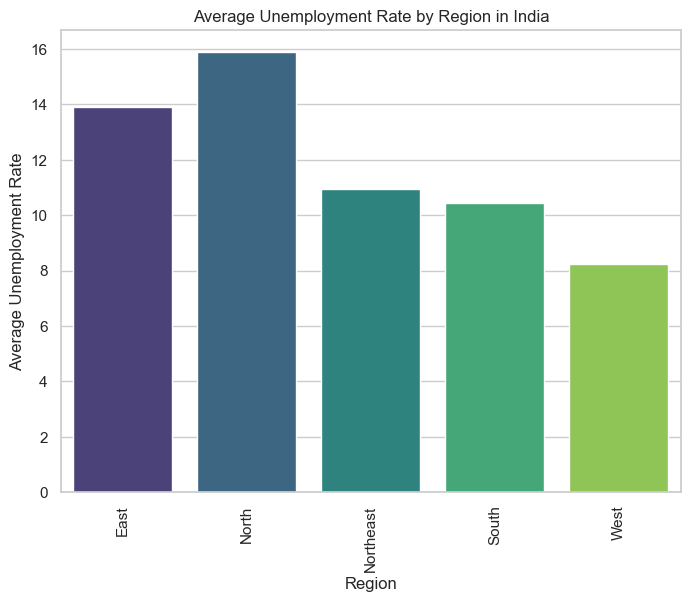

In [28]:
# average unemployment rate in each Region


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Calculate the average unemployment rate for each region
average_unemployment = df1.groupby('Region')[' Estimated Unemployment Rate'].mean().reset_index()

# Create a bar plot for the average unemployment rate
sns.barplot(data=average_unemployment, x='Region', y=' Estimated Unemployment Rate', palette='viridis')
plt.title('Average Unemployment Rate by Region in India')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


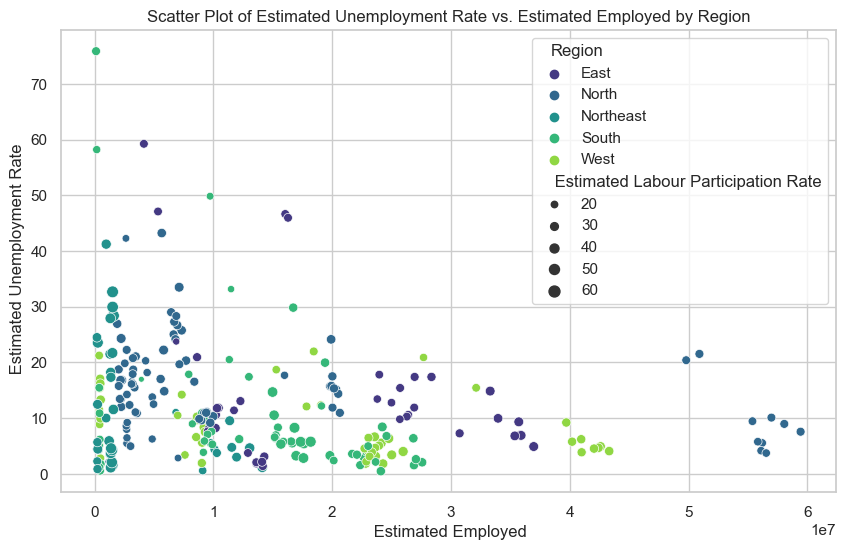

In [29]:
# scatter plot

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a scatter plot with color-coding by 'Region' and include 'Estimated Labour Participation Rate'
sns.scatterplot(data=df1, x=' Estimated Employed', y=' Estimated Unemployment Rate', hue='Region', palette='viridis', size=' Estimated Labour Participation Rate')
plt.title('Scatter Plot of Estimated Unemployment Rate vs. Estimated Employed by Region')

plt.show()


In [30]:
#color differentiation by 'Region'
fig = px.bar(df1, x='Region', y=' Estimated Unemployment Rate', animation_frame='Month_name',
             category_orders={'Month_name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']},
             color='Region',
             title='Unemployment Rate Across Regions (Jan 2020 - Oct 2020)')

fig.update_xaxes(categoryorder='array', categoryarray=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
fig.update_layout(xaxis_title='Region', yaxis_title='Estimated Unemployment Rate')

fig.show()

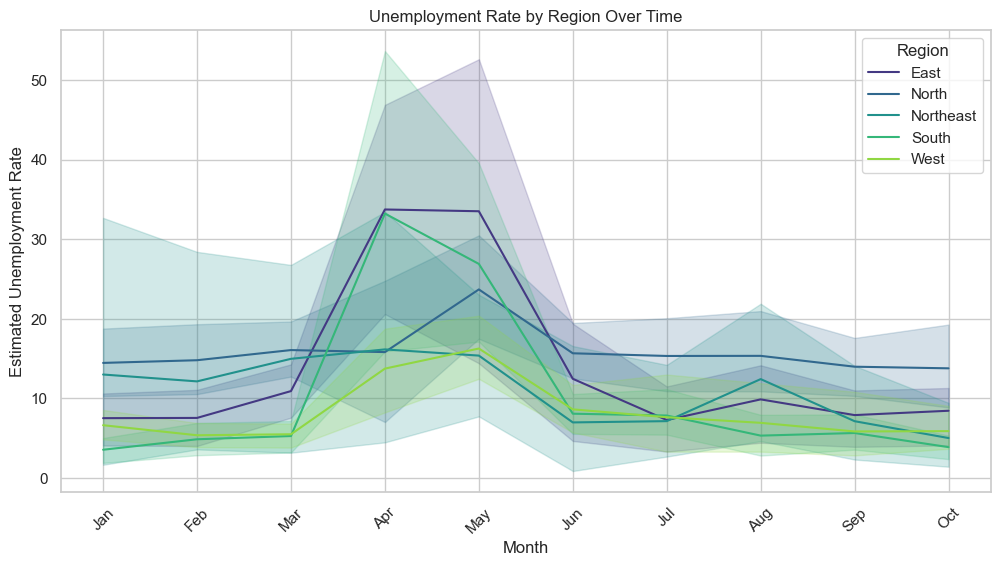

In [33]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a line plot for the unemployment rate by region over time
sns.lineplot(data=df1, x='Month_name', y=' Estimated Unemployment Rate', hue='Region', palette='viridis')

plt.title('Unemployment Rate by Region Over Time')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

##### Analysis on States

In [31]:
# state wise analysis
state =  df1.groupby(['State'])[[' Estimated Unemployment Rate',' Estimated Employed',' Estimated Labour Participation Rate']].mean()
state = pd.DataFrame(state).reset_index()
state

State   Estimated Unemployment Rate   Estimated Employed  \
0     Andhra Pradesh                      8.664000         1.542548e+07   
1              Assam                      4.856000         1.081028e+07   
2              Bihar                     19.471000         2.360683e+07   
3       Chhattisgarh                      7.819000         8.421349e+06   
4              Delhi                     18.414000         4.632822e+06   
5                Goa                     12.167000         4.423748e+05   
6            Gujarat                      6.376000         2.273075e+07   
7            Haryana                     27.477000         6.844059e+06   
8   Himachal Pradesh                     16.065000         2.033885e+06   
9    Jammu & Kashmir                     16.477778         3.310032e+06   
10         Jharkhand                     19.539000         8.770642e+06   
11         Karnataka                      7.668000         2.162402e+07   
12            Kerala                      9.434000         8.596795e+06   
13    Madhya Pradesh                      6.854000         2.231834e+07   
14       Maharashtra                      7.979000         3.920476e+07   
15         Meghalaya                      3.866000         1.349815e+06   
16            Odisha                      6.462000         1.272683e+07   
17        Puducherry                     17.942000         3.652629e+05   
18            Punjab                     11.981000         8.783034e+06   
19         Rajasthan                     15.868000         1.973175e+07   
20            Sikkim                      9.792500         2.345232e+05   
21        Tamil Nadu                     12.187000         2.198790e+07   
22         Telangana                      6.833000         1.624408e+07   
23           Tripura                     25.055000         1.397292e+06   
24     Uttar Pradesh                      9.737000         5.552480e+07   
25       Uttarakhand                     11.156000         2.743275e+06   
26       West Bengal                     10.192000         3.330516e+07   

     Estimated Labour Participation Rate  
0                              38.962000  
1                              43.498000  
2                              37.173000  
3                              41.161000  
4                              35.857000  
5                              39.242000  
6                              45.490000  
7                              42.100000  
8                              40.252000  
9                              37.894444  
10                             40.356000  
11                             42.000000  
12                             33.382000  
13                             38.926000  
14                             41.466000  
15                             59.859000  
16                             37.748000  
17                             35.918000  
18                             39.979000  
19                             40.591000  
20                             45.756250  
21                             37.383000  
22                             54.972000  
23                             57.848000  
24                             37.608000  
25                             35.259000  
26                             45.158000

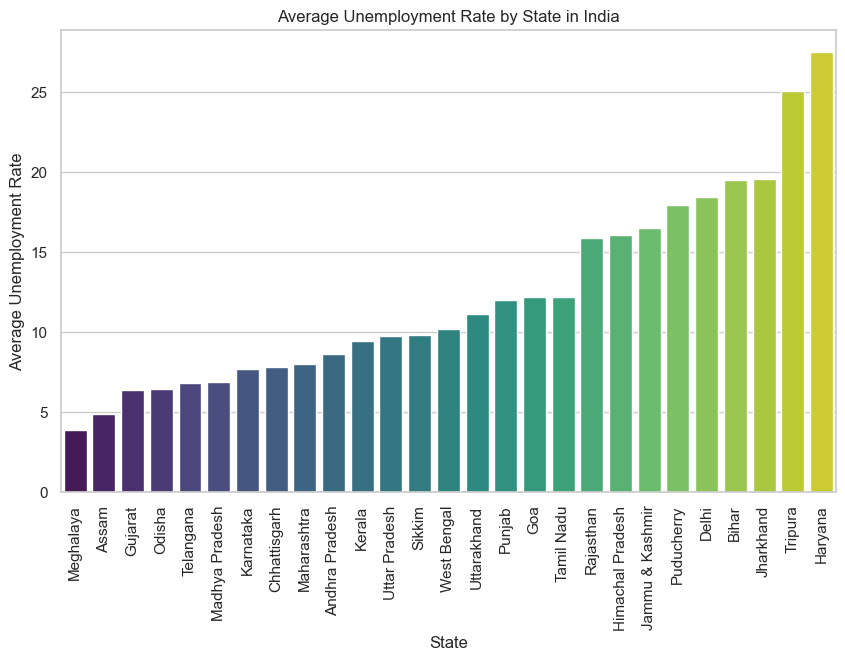

In [32]:
# unemployement rate in each state.

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# average unemployment rate for each state
average_unemployment = df1.groupby('State')[' Estimated Unemployment Rate'].mean().reset_index()

# Sort the DataFrame by the average unemployment rate in ascending order
average_unemployment = average_unemployment.sort_values(by=' Estimated Unemployment Rate')

sns.barplot(data=average_unemployment, x='State', y=' Estimated Unemployment Rate', palette='viridis')
plt.title('Average Unemployment Rate by State in India')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)

plt.show()

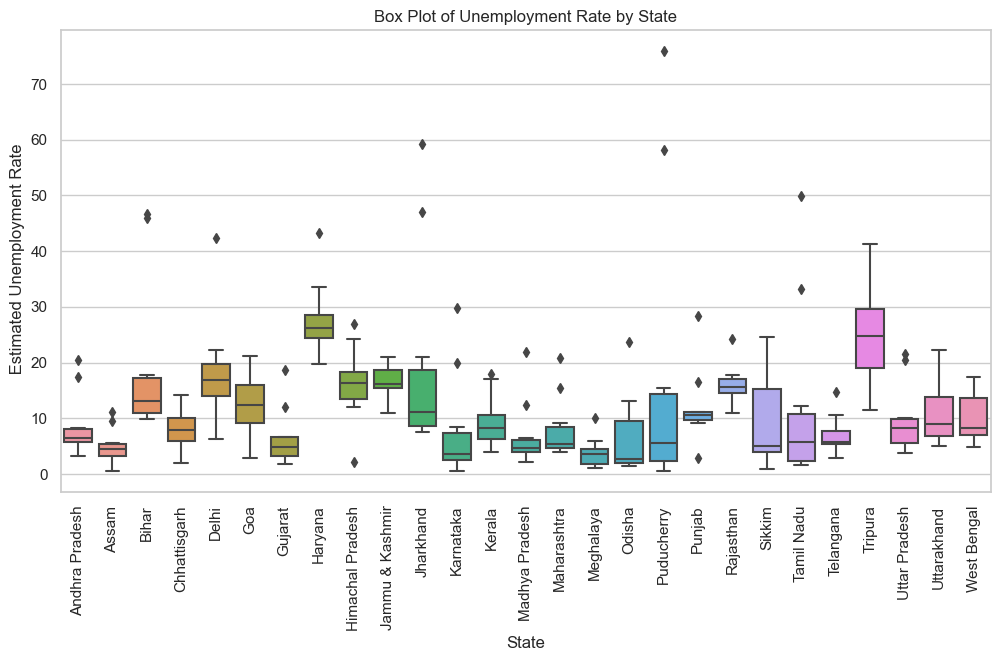

In [34]:
# Box plot on an unempolyment rate by state.

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y=' Estimated Unemployment Rate', data=df1)
plt.title('Box Plot of Unemployment Rate by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

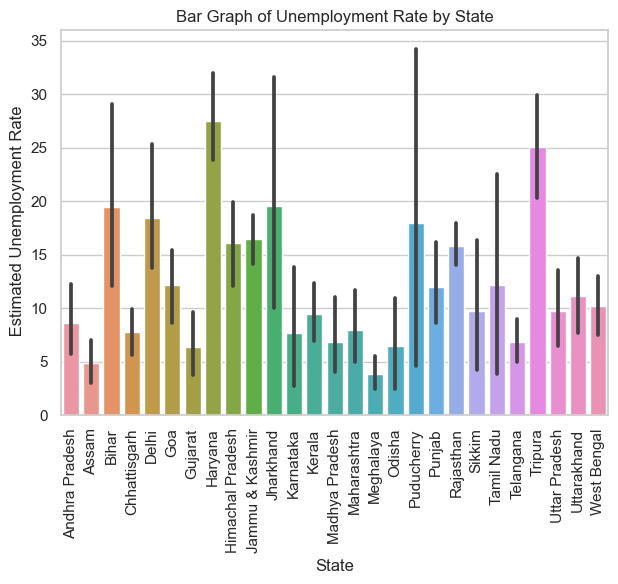

In [35]:
# bar graph
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 2)
sns.barplot(x='State', y=' Estimated Unemployment Rate', data=df1)
plt.title('Bar Graph of Unemployment Rate by State')
plt.xticks(rotation=90)

plt.tight_layout()  # Ensures the subplots don't overlap
plt.show()

##### Employed Analysis on Months

In [36]:
data = df1.groupby(['Month_name'])[[' Estimated Unemployment Rate',' Estimated Employed',' Estimated Labour Participation Rate']].mean().reset_index()
data

Month_name   Estimated Unemployment Rate   Estimated Employed  \
0        Apr                     22.236154         1.057020e+07   
1        Aug                     10.313333         1.442904e+07   
2        Feb                      9.266154         1.548827e+07   
3        Jan                      9.196538         1.563720e+07   
4        Jul                      9.834444         1.441802e+07   
5        Jun                     10.911111         1.385739e+07   
6        Mar                     10.782593         1.453866e+07   
7        May                     23.244444         1.150739e+07   
8        Oct                      8.026296         1.457998e+07   
9        Sep                      8.705926         1.458784e+07   

    Estimated Labour Participation Rate  
0                             35.297308  
1                             42.390741  
2                             44.180769  
3                             44.626538  
4                             42.274815  
5                             41.203333  
6                             43.746667  
7                             39.647778  
8                             41.438519  
9                             41.974444

In [39]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    # Add mappings for the remaining months
}
df1['month_int'] = df1['Month_name'].map(month_mapping)

# Filter the data for the specified months (before and after lockdown)
before_lockdown = df1[df1['month_int'] < 4]
after_lockdown = df1[(df1['month_int'] >= 4) & (df1['month_int'] <= 6)]


Unemployment rate Before and After Lockdown

In [40]:
# Calculate the mean unemployment rate for each state before lockdown
unemployment_before_lockdown = before_lockdown.groupby('State')[' Estimated Unemployment Rate'].mean().reset_index()

# Calculate the mean unemployment rate for each state after lockdown
unemployment_after_lockdown = after_lockdown.groupby('State')[' Estimated Unemployment Rate'].mean().reset_index()

# Merge the two dataframes to represent the data before and after lockdown
lockdown_data = unemployment_before_lockdown.merge(unemployment_after_lockdown, on='State', how='inner')
lockdown_data.columns = ['State', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']

# Display the modified dataframe
lockdown_data.head()

State  Unemployment Rate Before Lockdown  \
0  Andhra Pradesh                           5.700000   
1           Assam                           4.613333   
2           Bihar                          12.110000   
3    Chhattisgarh                           8.523333   
4           Delhi                          18.036667   

   Unemployment Rate After Lockdown  
0                         13.750000  
1                          7.070000  
2                         36.806667  
3                          9.380000  
4                         25.713333

In [41]:
# percentage change in unemployment rate
lockdown_data['rate change in unemployment'] = ((lockdown_data['Unemployment Rate After Lockdown'] - lockdown_data['Unemployment Rate Before Lockdown'])
                                           / lockdown_data['Unemployment Rate Before Lockdown']) * 100
lockdown_data['rate change in unemployment'] = round(lockdown_data['rate change in unemployment'], 2)

# Cbar plot to visualize the percentage change in unemployment rate
fig = px.bar(lockdown_data, x='State', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage Change in Unemployment Rate in Each State After Lockdown', template='ggplot2')

fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()


In [42]:
fig = px.scatter_matrix(df1, dimensions=[' Estimated Unemployment Rate', ' Estimated Employed', ' Estimated Labour Participation Rate'],
                        color='Region',
                        title='Relationships Between Unemployment Rate, Employment, and Labor Participation Rate by Region')

fig.show()